In [1]:
import os
import cv2
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from constants import *
from PIL import Image

In [2]:
# for every specie inthe SPECIES list, get the images in the test folder
test_images = []
train_images = []
for specie in SPECIES:
    test_images += [os.path.join("img/Test/", specie, image) for image in os.listdir(os.path.join("img/Test/", specie))]
    train_images += [os.path.join("img/Train/", specie, image) for image in os.listdir(os.path.join("img/Train/", specie))]

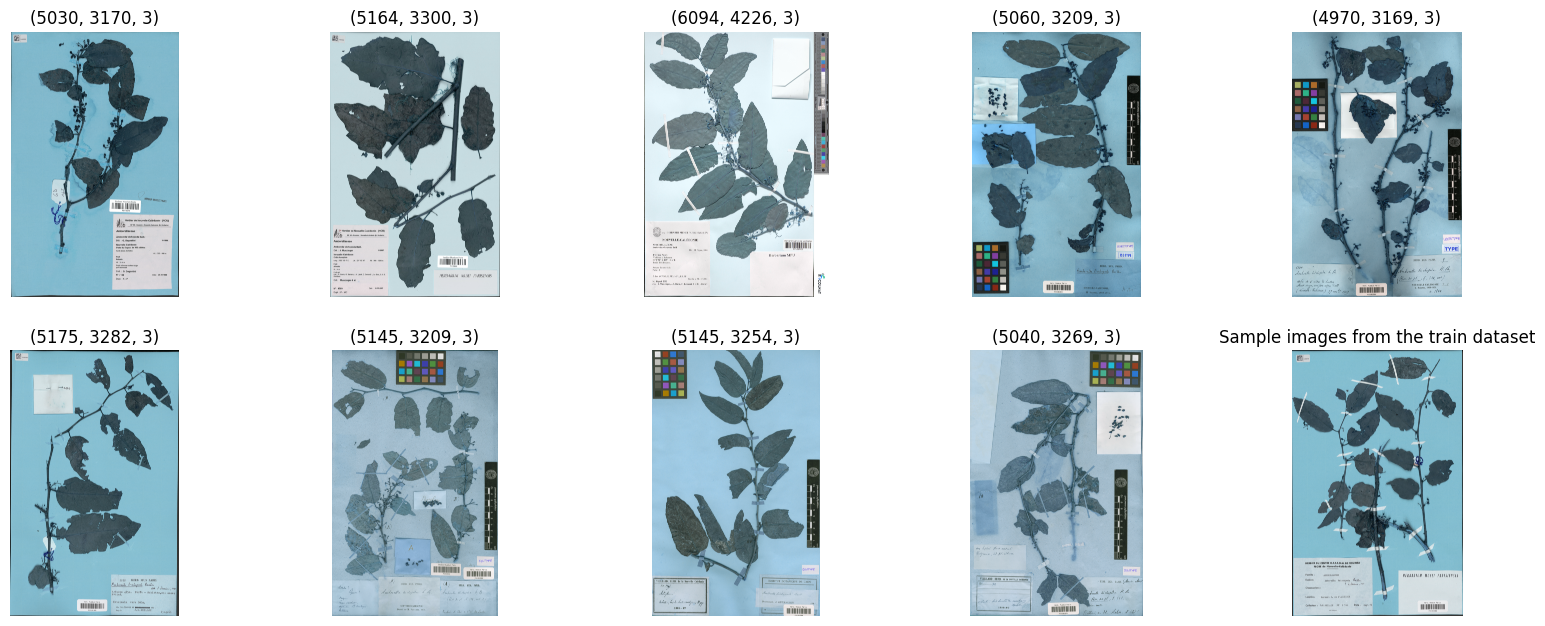

In [3]:
# display first 10 images in the train_images
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(cv2.imread(train_images[i]))
    plt.axis("off")
    # shape of the image
    plt.title(cv2.imread(train_images[i]).shape)
plt.title("Sample images from the train dataset")
plt.show()

In [4]:
# resize the images to 500x500 with the PIL thumbnail method
for image in train_images:
    img = Image.open(image)
    img.thumbnail((500, 500))
    image = image.replace("Train", "Train Resized")
    img.save(image)


In [5]:
train_images = []
for specie in SPECIES:
    train_images += [os.path.join("img/Train Resized/", specie, image) for image in os.listdir(os.path.join("img/Train Resized/", specie))]

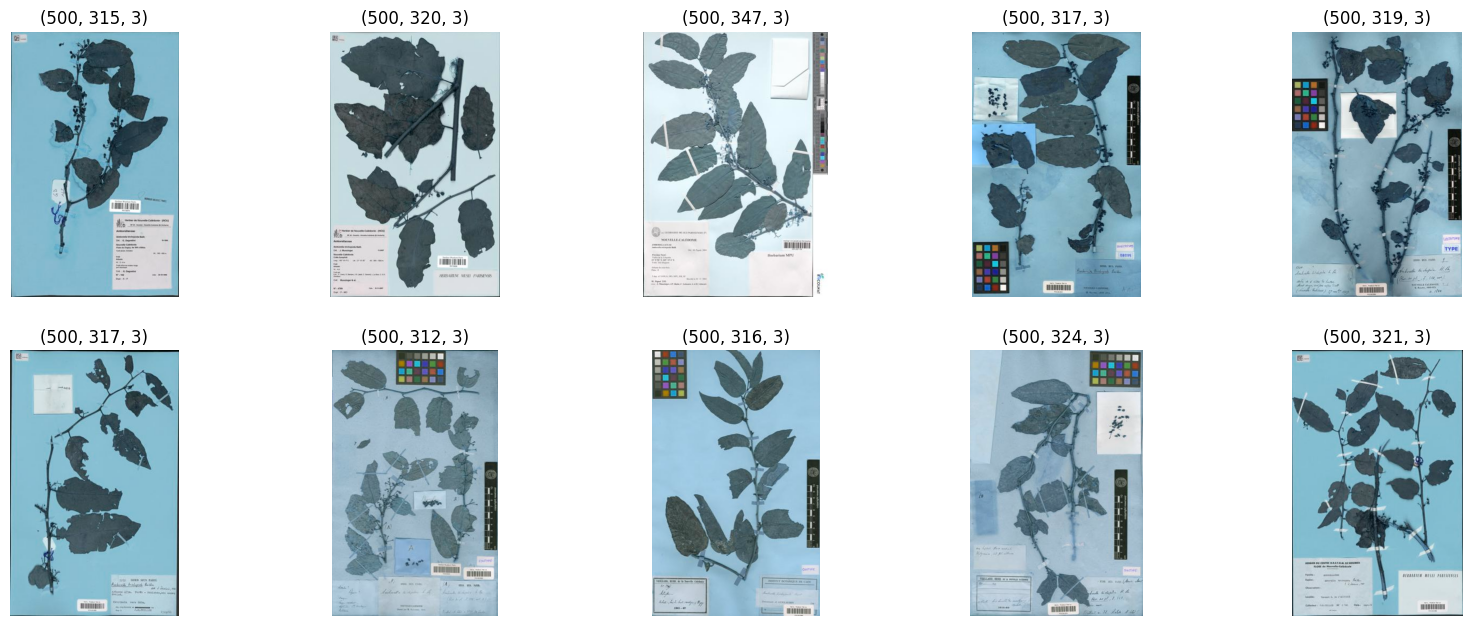

In [6]:
# display first 10 images in the train_images
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(cv2.imread(train_images[i]))
    plt.axis("off")
    # shape of the image
    plt.title(cv2.imread(train_images[i]).shape)
plt.show()

In [7]:
# get max width and height of the images
max_width = 0
max_height = 0
for image in train_images:
    img = cv2.imread(image)
    if img.shape[0] > max_height:
        max_height = img.shape[0]
    if img.shape[1] > max_width:
        max_width = img.shape[1]
        

In [8]:
max_height, max_width

(500, 391)

In [9]:
# add padding to the images to make them the same size
def add_padding(image):
    # get the shape of the image
    height, width, _ = image.shape
    # calculate the difference in height and width
    height_diff = max_height - height
    width_diff = max_width - width
    # add padding to the image
    image = cv2.copyMakeBorder(
        image,
        top=height_diff // 2,
        bottom=height_diff - height_diff // 2,
        left=width_diff // 2,
        right=width_diff - width_diff // 2,
        borderType=cv2.BORDER_REPLICATE,
        value=[0, 0, 0],
    )
    return image

In [10]:
train_images_padded = [add_padding(cv2.imread(image)) for image in train_images]

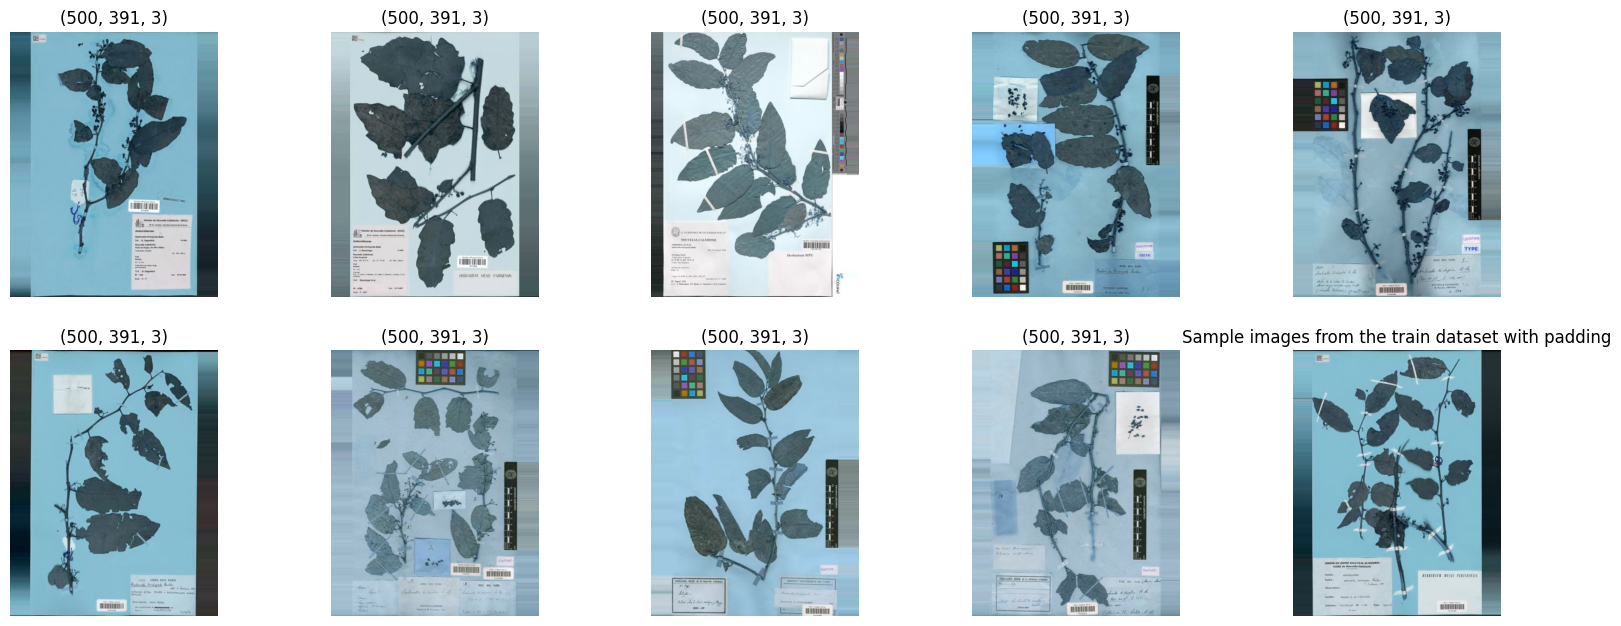

In [11]:
# display first 10 images in the train_images_padded
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images_padded[i])
    plt.axis("off")
    # shape of the image
    plt.title(train_images_padded[i].shape)
plt.title("Sample images from the train dataset with padding")
plt.show()

In [12]:
# save the padded images
for i in range(len(train_images)):
    filename = train_images[i].replace("Train Resized", "Train Padded")
    cv2.imwrite(filename, train_images_padded[i])

In [13]:
# create a dataframe with the padded images and their labels
train_images_padded = []
for specie in SPECIES:
    train_images_padded += [os.path.join("img/Train Padded/", specie, image) for image in os.listdir(os.path.join("img/Train Padded/", specie))]
train_df = pd.DataFrame({"image": train_images_padded, "label": [image.split("/")[2] for image in train_images_padded]})

In [14]:
# shuffle the dataframe
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [15]:
# save the dataframe
train_df.to_csv("dataframes/train.csv", index=False)

In [16]:
# repeat the same process for the test images
test_images = []
for specie in SPECIES:
    test_images += [os.path.join("img/Test/", specie, image) for image in os.listdir(os.path.join("img/Test/", specie))]

# resize the images to 500x500 with the PIL thumbnail method
for image in test_images:
    img = Image.open(image)
    img.thumbnail((500, 500))
    image = image.replace("Test", "Test Resized")
    img.save(image)

test_images = []
for specie in SPECIES:
    test_images += [os.path.join("img/Test Resized/", specie, image) for image in os.listdir(os.path.join("img/Test Resized/", specie))]

# get max width and height of the images
max_width = 0
max_height = 0
for image in test_images:
    img = cv2.imread(image)
    if img.shape[0] > max_height:
        max_height = img.shape[0]
    if img.shape[1] > max_width:
        max_width = img.shape[1]

# add padding to the images to make them the same size
test_images_padded = [add_padding(cv2.imread(image)) for image in test_images]

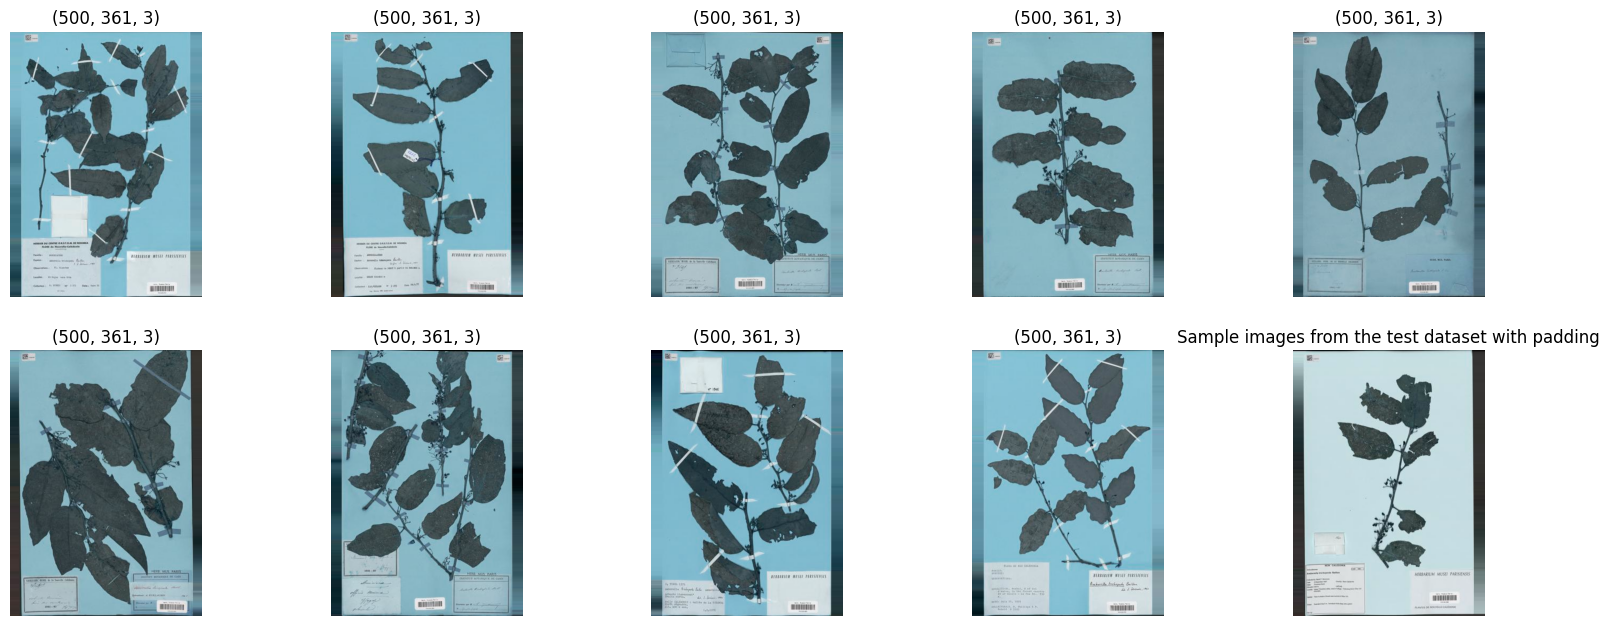

In [17]:
# display first 10 images in the test_images_padded
plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images_padded[i])
    plt.axis("off")
    # shape of the image
    plt.title(test_images_padded[i].shape)
plt.title("Sample images from the test dataset with padding")
plt.show()

In [18]:
# save the padded images
for i in range(len(test_images)):
    filename = test_images[i].replace("Test Resized", "Test Padded")
    cv2.imwrite(filename, test_images_padded[i])

In [19]:
# create a dataframe with the padded images and their labels
test_images_padded = []
for specie in SPECIES:
    test_images_padded += [os.path.join("img/Test Padded/", specie, image) for image in os.listdir(os.path.join("img/Test Padded/", specie))]
test_df = pd.DataFrame({"image": test_images_padded, "label": [image.split("/")[2] for image in test_images_padded]})
# shuffle the dataframe
test_df = test_df.sample(frac=1).reset_index(drop=True)
# save the dataframe
test_df.to_csv("dataframes/test.csv", index=False)